# Dataproject

**Table of contents**<a id='toc0_'></a>  
- [1. Objectives](#toc1_)
- [2. Import of packages](#toc2_)
- [3. Reading and cleaning data](#toc3_)
- [4. Merging datasets](#toc4_)
- [5. Analysis](#toc5_)
- [6. Concluding remarks](#toc6_)

## 1. <a id='toc1_'></a>[Objectives](#toc1_)

This project will look into sport habits of adults in Denmark. In the period 2014-2022 we look for tendancies in sporting activity in connection to sport events attendance. Be aware that the main objective of this project is to show our coding ability rather than the empirical takeaways.

We expect to find a relationsship between being a membership of a sport orginization and the attendance to the same sport event. When the danish national handball team (women) had it's golden era in the 1990'es the handball orginizations in Denmark saw an explosive rise in memberships. It became popular to watch the games so the attendance rose simultaneously with the rise in memberships.

## 2. <a id='toc2_'></a>[Import of packages](#toc2_)

In [1]:
%load_ext autoreload
%autoreload 2

We will fetch data from DST (Statistikbanken). Being able to do so you need to have the following package downloaded. Simply remove the `#` if it is not downloaded on your computer

In [2]:
#%pip install git+https://github.com/alemartinello/dstapi
#%pip install pandas-datareader
#%pip install matplotlib-venn

Below we download the relevant packages that we will need when cleaning, interacting and plotting our data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import ipywidgets as widgets

import os 

from dstapi import DstApi

from matplotlib_venn import venn2 # `pip install matplotlib-venn`

## 3. <a id='toc3_'></a>[Reading and cleaning data](#toc3_)

We will import the data using two different techniques:
1. Downloading and storing data in our repository
2. Fetching directly from DST

Importing the first dataset we exploit technique 1. The data contain information of number of adult members selected sports orginizations in Denmark have registered. (Omformuler)

First of all, we make sure that the data is stored correctly

In [4]:
assert os.path.isdir('data/')
assert os.path.isfile('data/sport.csv')

print('Our repository contain the datasets: ')
os.listdir('data/')

Our repository contain the datasets: 


['sport2.csv', 'sport.csv']

We read the relevant file

In [5]:
# Import data from our py.file
from dataproject import filename

# A short preview of the first 5 rows in the dataset
pd.read_csv(filename, encoding='latin1').head(5)

,";"" "";"" "";"" "";""2014"";""2015"";""2016"";""2017"";""2018"";""2019"";""2020"";""2021"";""2022"""
0,25-59 ï¿½r
1,";""Kï¿½n i alt"""
2,";"" "";""Hele landet"""
3,";"" "";"" "";""Atletik"";12840;8280;3920;3020;2670;..."
4,";"" "";"" "";""Amerikansk fodbold"";820;890;990;100..."


In [6]:
# We tell Python that ';' is meant to be a seperator
sport = pd.read_csv(filename, sep=';')
sport.head(5)

,,.1,.2,.3,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,25-59 �r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,K�n i alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,,Hele landet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,,,Atletik,12840,8280,3920,3020,2670,2590,2460,3210.0,2400.0
4,,,,Amerikansk fodbold,820,890,990,1000,920,930,930,970.0,910.0


The data now looks better. Next we will delete the first 3 rows as they don't contain relevant data

In [7]:
# Drop first 3 rows
sport_cleaned = sport.drop([0,1,2])
print(sport_cleaned.head(5))

      .1  .2                  .3   2014   2015   2016   2017   2018   2019  \
3                        Atletik  12840   8280   3920   3020   2670   2590   
4             Amerikansk fodbold    820    890    990   1000    920    930   
5                      Badminton  63880  59350  58620  57060  55460  53710   
6                     Basketball   3170   3120   3530   3440   4010   4160   
7                     Bordtennis   4130   4150   3990   3950   4010   4090   

    2020     2021     2022  
3   2460   3210.0   2400.0  
4    930    970.0    910.0  
5  51840  49190.0  49160.0  
6   4320   4230.0   4590.0  
7   3640   3420.0   3570.0  


Now the first two columns are irrelevant. We remove them as well

In [8]:
# The columns that we want to drop
sport_drop = ['.1', '.2']

# We remove white spaces
sport_cleaned.columns = sport_cleaned.columns.str.strip()

# Drop the columns 
sport_cleaned = sport_cleaned.drop(columns=sport_drop)

# Preview
print(sport_cleaned.head(5))

                      .3   2014   2015   2016   2017   2018   2019   2020  \
3                Atletik  12840   8280   3920   3020   2670   2590   2460   
4     Amerikansk fodbold    820    890    990   1000    920    930    930   
5              Badminton  63880  59350  58620  57060  55460  53710  51840   
6             Basketball   3170   3120   3530   3440   4010   4160   4320   
7             Bordtennis   4130   4150   3990   3950   4010   4090   3640   

      2021     2022  
3   3210.0   2400.0  
4    970.0    910.0  
5  49190.0  49160.0  
6   4230.0   4590.0  
7   3420.0   3570.0  


In [9]:
# Renaming the first column
sport_cleaned.rename(columns = {'.3':'event'}, inplace=True)
sport_cleaned.head(5)

,,event,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,,Atletik,12840,8280,3920,3020,2670,2590,2460,3210.0,2400.0
4,,Amerikansk fodbold,820,890,990,1000,920,930,930,970.0,910.0
5,,Badminton,63880,59350,58620,57060,55460,53710,51840,49190.0,49160.0
6,,Basketball,3170,3120,3530,3440,4010,4160,4320,4230.0,4590.0
7,,Bordtennis,4130,4150,3990,3950,4010,4090,3640,3420.0,3570.0


In [10]:
# Reset the index
sport_cleaned.reset_index(inplace=True, drop=True)
sport_cleaned.head(5)

,,event,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,,Atletik,12840,8280,3920,3020,2670,2590,2460,3210.0,2400.0
1,,Amerikansk fodbold,820,890,990,1000,920,930,930,970.0,910.0
2,,Badminton,63880,59350,58620,57060,55460,53710,51840,49190.0,49160.0
3,,Basketball,3170,3120,3530,3440,4010,4160,4320,4230.0,4590.0
4,,Bordtennis,4130,4150,3990,3950,4010,4090,3640,3420.0,3570.0


We see that the data 2014-2020 are not treated numerically 

In [11]:
# Change data so that it is treated numerically
numerical = ['2014','2015','2016','2017','2018','2019','2020']
sport_cleaned[numerical] = sport_cleaned[numerical].apply(pd.to_numeric, errors='coerce')
print(sport_cleaned.dtypes)

          object
event     object
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
2021     float64
2022     float64
dtype: object


In [12]:
# A short descrition of the data
sport_cleaned.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,18.000000,18.000000,18.000000,19.000000,19.000000,19.000000,19.000000,20.000000,20.000000
mean,32907.777778,32481.666667,32731.111111,30890.526316,31340.526316,32039.473684,30157.894737,28394.500000,29680.500000
std,32538.670126,33011.797757,35950.078277,35601.227737,37180.949942,37917.939096,34989.939122,33168.506539,34754.000069
min,820.000000,890.000000,990.000000,340.000000,790.000000,930.000000,930.000000,970.000000,910.000000
25%,6545.000000,4852.500000,4232.500000,3695.000000,4010.000000,4125.000000,3980.000000,4027.500000,4335.000000
50%,22630.000000,22585.000000,22125.000000,21350.000000,21170.000000,20850.000000,20180.000000,14835.000000,17200.000000
75%,47222.500000,48977.500000,50285.000000,51080.000000,48910.000000,52090.000000,44735.000000,42990.000000,43020.000000
max,99920.000000,103360.000000,130980.000000,129880.000000,137840.000000,140750.000000,128490.000000,116670.000000,125420.000000


What do we see (short)

Having variables named as a numbers is problematic. Thus, we rename our year-variables. To do that, we use a dictonary.  

In [13]:
col_dict = {}
for i in range(2014,2022+1):
    col_dict[str(i)] = f'sport_{i}'

col_dict = {str(i) : f'sport_{i}' for i in range(2014,2022+1)}
col_dict

{'2014': 'sport_2014',
 '2015': 'sport_2015',
 '2016': 'sport_2016',
 '2017': 'sport_2017',
 '2018': 'sport_2018',
 '2019': 'sport_2019',
 '2020': 'sport_2020',
 '2021': 'sport_2021',
 '2022': 'sport_2022'}

In [14]:
# Renaming
sport_cleaned.rename(columns=col_dict,inplace=True)
sport_cleaned.head(10)

,,event,sport_2014,sport_2015,sport_2016,sport_2017,sport_2018,sport_2019,sport_2020,sport_2021,sport_2022
0,,Atletik,12840.0,8280.0,3920.0,3020.0,2670.0,2590.0,2460.0,3210.0,2400.0
1,,Amerikansk fodbold,820.0,890.0,990.0,1000.0,920.0,930.0,930.0,970.0,910.0
2,,Badminton,63880.0,59350.0,58620.0,57060.0,55460.0,53710.0,51840.0,49190.0,49160.0
3,,Basketball,3170.0,3120.0,3530.0,3440.0,4010.0,4160.0,4320.0,4230.0,4590.0
4,,Bordtennis,4130.0,4150.0,3990.0,3950.0,4010.0,4090.0,3640.0,3420.0,3570.0
5,,Cykling,36880.0,39400.0,39190.0,38100.0,37120.0,35320.0,34110.0,32840.0,29680.0
6,,Dans,13720.0,12480.0,12700.0,12490.0,11300.0,11290.0,9340.0,9430.0,9840.0
7,,Esport,NaN,NaN,NaN,340.0,790.0,1250.0,1370.0,1680.0,1800.0
8,,Fitness,99920.0,103360.0,130980.0,129880.0,137840.0,140750.0,128490.0,116670.0,125420.0
9,,Fodbold,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0


In [15]:
sport_cleaned.loc[sport_cleaned.event == 'Fodbold']

,,event,sport_2014,sport_2015,sport_2016,sport_2017,sport_2018,sport_2019,sport_2020,sport_2021,sport_2022
9,,Fodbold,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0


The data is better in a long format since we have two identifiers, event and year

In [16]:
# Arranging the data to a long dataset
sport_long = pd.wide_to_long(sport_cleaned, stubnames='sport_', i='event', j='year')
sport_long.head(5)

,,,sport_
event,year,,
Atletik,2014,,12840.0
Amerikansk fodbold,2014,,820.0
Badminton,2014,,63880.0
Basketball,2014,,3170.0
Bordtennis,2014,,4130.0


We now take a look into the national sport of Denmark, football

In [17]:
sport_long.xs('Fodbold', level='event')

,,sport_
year,,
2014,,97240.0
2015,,98010.0
2016,,95900.0
2017,,96030.0
2018,,101740.0
2019,,101790.0
2020,,96860.0
2021,,102330.0
2022,,101580.0


We see that the number of members has been increasing in the period

In [18]:
# Remember to reset the index
sport_long = sport_long.reset_index()
sport_long.loc[sport_long.event == 'Fodbold', :]

,event,year,,sport_
9,Fodbold,2014,,97240.0
29,Fodbold,2015,,98010.0
49,Fodbold,2016,,95900.0
69,Fodbold,2017,,96030.0
89,Fodbold,2018,,101740.0
109,Fodbold,2019,,101790.0
129,Fodbold,2020,,96860.0
149,Fodbold,2021,,102330.0
169,Fodbold,2022,,101580.0


<Axes: xlabel='year'>

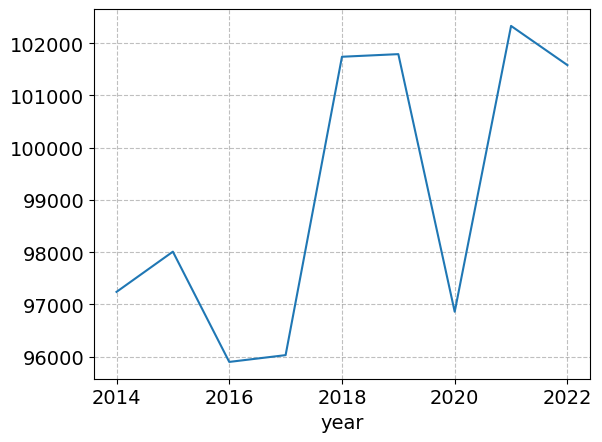

In [19]:
# Plotting the trend
sport_fodbold = sport_long.loc[sport_long['event'] == 'Fodbold', :]
sport_fodbold.plot(x='year',y='sport_',legend=False)

In [25]:
# Creating a dropdown menu, allowing to see the trend for every sport
import ipywidgets as widgets
def plot_e(df, sport):
    I = df['event'] == sport
    ax=df.loc[I,:].plot(x='year', y='sport_', style='-o', legend=False)

In [27]:
widgets.interact(plot_e,
    df = widgets.fixed(sport_long),
    sport = widgets.Dropdown(description='event',
                             options=sport_long.event.unique(),
                             value='Fodbold') 
);

interactive(children=(Dropdown(description='event', index=9, options=('Atletik', 'Amerikansk fodbold', 'Badmin…

## Fetching data 

We will use DstApi. The dataset contain information of the attendance to the 4 most attended sports (icehockey, football, handball and basketball) in the period 2007-2023. We choose to focus on the national teams and highest(hvad kalder man det) leagues since these are most attendent and 

In [28]:
# Fetching the data and displaying
ind = DstApi('IDRTIL01')
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table IDRTIL01: Attendances at selected sportsevents by sport, attendances and matches and time
Last update: 2023-10-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,SPORTS,24,SPO005,Ice hockey - International (In Denmark) - men,SPO115,Handball - 1. Division - women,False
1,TILSKUER,3,ENH05,Attendances (numbers),ENH15,Average attendances per match,False
2,Tid,17,2006/2007,2006/2007,2022/2023,2022/2023,True


In [29]:
# Get an overview of relevant variables to be chosen
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

SPORTS:


,id,text
0,SPO005,Ice hockey - International (In Denmark) - men
1,SPO010,Ice hockey - The Ice Hockey League - men
2,SPO015,Ice hockey - The Ice Hockey League play-offs a...
3,SPO020,Ice hockey - The Ice Hockey League - Season to...
4,SPO025,Football - International (In Denmark) - men
5,SPO030,Football - International (In Denmark) - women
6,SPO035,Football - Superleague - men
7,SPO040,Football - 1. Division - men
8,SPO045,Football - 2. Division - men
9,SPO120,Football - 3. Division - men


TILSKUER:


,id,text
0,ENH05,Attendances (numbers)
1,ENH10,Matches (numbers)
2,ENH15,Average attendances per match


Tid:


,id,text
0,2006/2007,2006/2007
1,2007/2008,2007/2008
2,2008/2009,2008/2009
3,2009/2010,2009/2010
4,2010/2011,2010/2011
5,2011/2012,2011/2012
6,2012/2013,2012/2013
7,2013/2014,2013/2014
8,2014/2015,2014/2015
9,2015/2016,2015/2016


In [30]:
params = ind._define_base_params(language='en')
params

{'table': 'idrtil01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'SPORTS', 'values': ['*']},
  {'code': 'TILSKUER', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [31]:
# Fetching the appropiate data
params = {'table': 'idrtil01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'SPORTS', 'values': ['SPO005', 'SPO020', 'SPO025', 'SPO035', 'SPO050','SPO065','SPO070','SPO090']},
  {'code': 'TILSKUER', 'values': ['ENH15']},
  {'code': 'Tid', 'values': ['*']}]}
params

{'table': 'idrtil01',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'SPORTS',
   'values': ['SPO005',
    'SPO020',
    'SPO025',
    'SPO035',
    'SPO050',
    'SPO065',
    'SPO070',
    'SPO090']},
  {'code': 'TILSKUER', 'values': ['ENH15']},
  {'code': 'Tid', 'values': ['*']}]}

In [32]:
# Fetching the appropiate data
sport_api = ind.get_data(params=params)
sport_api.head(10)

,SPORTS,TILSKUER,TID,INDHOLD
0,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2006/2007,..
1,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2007/2008,..
2,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2008/2009,1437
3,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2009/2010,1362
4,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2011/2012,1489
5,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2012/2013,1695
6,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2013/2014,1661
7,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2014/2015,1683
8,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2015/2016,1540
9,Ice hockey - The Ice Hockey League - Season to...,Average attendances per match,2016/2017,1449


In [33]:
# Renaming the variables
sport_api.rename(columns={'INDHOLD':'avr_attend'}, inplace=True)
sport_api.rename(columns={'TID':'year'}, inplace=True)
sport_api.rename(columns={'SPORTS':'event'}, inplace=True)
sport_api.drop(columns=['TILSKUER'], inplace=True)
sport_api.head(20)

,event,year,avr_attend
0,Ice hockey - The Ice Hockey League - Season to...,2006/2007,..
1,Ice hockey - The Ice Hockey League - Season to...,2007/2008,..
2,Ice hockey - The Ice Hockey League - Season to...,2008/2009,1437
3,Ice hockey - The Ice Hockey League - Season to...,2009/2010,1362
4,Ice hockey - The Ice Hockey League - Season to...,2011/2012,1489
5,Ice hockey - The Ice Hockey League - Season to...,2012/2013,1695
6,Ice hockey - The Ice Hockey League - Season to...,2013/2014,1661
7,Ice hockey - The Ice Hockey League - Season to...,2014/2015,1683
8,Ice hockey - The Ice Hockey League - Season to...,2015/2016,1540
9,Ice hockey - The Ice Hockey League - Season to...,2016/2017,1449


In [34]:
# Changing the names of the events
new_names = {
    'Ice hockey - The Ice Hockey League - Season total - men':'icehockey league',
    'Ice hockey - International (In Denmark) - men':'icehockey national team',
    'Basketball - International (In Denmark) - men':'basketball national team',
    'Football - International (In Denmark) - men':'football national team',
    'Football - Superleague - men':'football league',
    'Basketball -The Basketball League season total - men':'basketball league',
    'Handball - International (In Denmark) - men':'handball national team',
    'Handball - The Handball League season total - men':'handball league'
}

# Applying the new names
sport_api['event'] = sport_api['event'].replace(new_names)

sport_api.head(20)

,event,year,avr_attend
0,icehockey league,2006/2007,..
1,icehockey league,2007/2008,..
2,icehockey league,2008/2009,1437
3,icehockey league,2009/2010,1362
4,icehockey league,2011/2012,1489
5,icehockey league,2012/2013,1695
6,icehockey league,2013/2014,1661
7,icehockey league,2014/2015,1683
8,icehockey league,2015/2016,1540
9,icehockey league,2016/2017,1449


A problem arises in our dataset. In Denmark sport seasons start and end in the summer rather than following the calendar year. For simplicity we make the following arrangement: 

2006/2007 season we will count as 2007, 2007/2008 as 2008,...,2022/2023 as 2023. This is not a perfect arrangement, but necessary for our analysis

In [57]:
# Changes the years for comparison
new_years = {
    '2006/2007':'2007',
    '2007/2008':'2008',
    '2008/2009':'2009',
    '2009/2010':'2010',
    '2010/2011':'2011',
    '2011/2012':'2012',
    '2012/2013':'2013',
    '2013/2014':'2014',
    '2014/2015':'2015',
    '2015/2016':'2016',
    '2016/2017':'2017',
    '2017/2018':'2018',
    '2018/2019':'2019',
    '2019/2020':'2020',
    '2020/2021':'2021',
    '2021/2022':'2022',
    '2022/2023':'2023'
}

# Tries to create a loop for simplicity 
new_year_loop = {}
for year in range(2006,2023+1):
    year_str = str(year)
    next_year_str = str(year+1)
    new_year_loop[f'{year_str}/{next_year_str}'] = year_str

# Check
sport_api['year'] = sport_api['year'].replace(new_year_loop)
sport_api.head(20)

,event,year,avr_attend
0,icehockey league,2006,..
1,icehockey league,2007,..
2,icehockey league,2008,1437
3,icehockey league,2009,1362
4,icehockey league,2011,1489
5,icehockey league,2012,1695
6,icehockey league,2013,1661
7,icehockey league,2014,1683
8,icehockey league,2015,1540
9,icehockey league,2016,1449


## 4. <a id='toc4_'></a>[Merging datasets](#toc4_)

In [62]:
sports_wanted = ['Fodbold','Ishockey','Basketball','Handbold']
danish_to_english = {
    'Fodbold':'football',
    'Ishockey':'icehockey',
    'Basketball':'basketball',
    'Handbold':'handball'    
}

sport_download = sport_long[sport_long['event'].isin(sports_wanted)]
sport_download.reset_index(inplace=True, drop=True)
sport_download.loc[:, 'sport_'] = sport_download['sport_'].replace(danish_to_english)

sport_download


,event,year,,sport_
0,Basketball,2014,,3170.0
1,Fodbold,2014,,97240.0
2,Handbold,2014,,22830.0
3,Ishockey,2014,,1430.0
4,Basketball,2015,,3120.0
5,Fodbold,2015,,98010.0
6,Handbold,2015,,22640.0
7,Ishockey,2015,,1500.0
8,Basketball,2016,,3530.0
9,Fodbold,2016,,95900.0


## 5. <a id='toc5_'></a>[Analysis](#toc5_)

## 6. <a id='toc6_'></a>[Concluding remarks](#toc6_)

First and foremost, we recognize that our analysis and approach are not the most efficient one. The data itself had its problems, one counted on annual basis, the other seasonally - moreover one counted the memberships of adults while the other counted attendance of all age groups. 

That being said, we see... 